this one seems to be working well!

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from tqdm.notebook import tqdm
import random

(30, 5000)
5000
testing packing


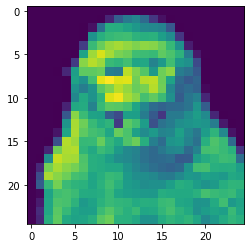

In [102]:
M = 30
im_dim = 25
im_size = (im_dim,im_dim)
img1 = cv2.resize(cv2.imread('monkey.png',0),im_size) #load monkey image as greyscale
img2 = cv2.resize(cv2.imread('dog.png',0),im_size) #load dog image as greyscale
patterns = np.random.randint(256, size=(M,im_dim,im_dim),dtype=np.uint8);
patterns[0,:,:] = img1
patterns[1,:,:] = img2

patterns_bits = np.unpackbits(np.reshape(patterns,(M,im_dim*im_dim)),axis=1)
print(np.shape(patterns_bits)) #packing image patterns into vectors of bits
nbits = np.shape(patterns_bits)[1]
print(nbits)
#testing unpacking patterns into vectors of bits
print("testing packing")
test_patterns = np.reshape(np.packbits(patterns_bits,axis=1),(M,im_dim,im_dim)) 
plt.imshow(test_patterns[0]);

In [103]:
W = np.zeros((nbits,nbits))
for i in range(M):
    W += np.outer((patterns_bits[i,:]-1/2),(patterns_bits[i,:]-1/2))#finding weights based on image

np.fill_diagonal(W,0)
print(W)

[[ 0.   2.   1.5 ... -1.5 -0.5 -1. ]
 [ 2.   0.  -1.  ... -2.   0.  -1.5]
 [ 1.5 -1.   0.  ... -0.5 -0.5  0. ]
 ...
 [-1.5 -2.  -0.5 ...  0.  -0.5  2. ]
 [-0.5  0.  -0.5 ... -0.5  0.  -1. ]
 [-1.  -1.5  0.  ...  2.  -1.   0. ]]


In [104]:
def run(iterations,W,neurons,interval):
    imgs_interval = []
    neurons_interval = []
    neuron_iter = neurons
    for i in tqdm(range(iterations)):
        index = random.sample(range(0, len(neurons)), int(nbits/10));
        selecW = W[index,:]
        selecW = selecW[:,index]
        neuron_iter[index] = np.dot(selecW,neuron_iter[index])>=0
        if i%interval==0:
            imgs_interval.append(np.reshape(np.packbits(neuron_iter),im_size))
            neurons_interval.append(neuron_iter)
    return imgs_interval,neurons_interval

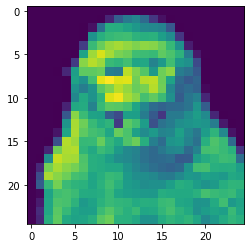

In [105]:
#create neural network with all neurons assigned 0/1 randomly with prob=0.5
#except for the first neurons which are set to the values of the image
to_use = patterns_bits[0,:]
neurons = patterns_bits[0,:]
#neurons[0:int(nbits*.5)] = to_use[0:int(nbits*.5)]
#neurons[int(nbits*.7):nbits] = to_use[int(nbits*.7):nbits]
plt.imshow(np.reshape(np.packbits(neurons),im_size));

In [106]:
imgs,neurons = run(1000,W,neurons,10)

  0%|          | 0/1000 [00:00<?, ?it/s]

[]

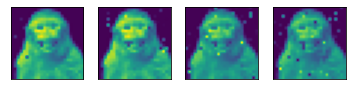

In [107]:
fig, axs = plt.subplots(1,4)
axs[0].imshow(imgs[0]);
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(imgs[33]);
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].imshow(imgs[66]);
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[3].imshow(imgs[99]);
axs[3].set_xticks([])
axs[3].set_yticks([])

In [108]:
err = (imgs[99]-imgs[0])>0
np.mean(err)


0.1072